In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

2025-10-14 11:39:06.181522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760441946.412717      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760441946.469739      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#gpu check
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


**Data preprocessing**

In [3]:
#training set
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels='inferred',
    label_mode='categorical', #labels are categorical, multi-class classification
    batch_size=32,
    image_size=(128, 128),
    shuffle=True)

Found 70295 files belonging to 38 classes.


I0000 00:00:1760441980.684041      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [4]:
#validation set
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128),
    shuffle=False)

Found 17572 files belonging to 38 classes.


**Model building**

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

#to avoid overfitting
model.add(Dropout(0.25))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#flattening 
model.add(Flatten())

#ann
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.25))

#output layer 

model.add(Dense(units=38,activation='softmax')) #38 classes, 
                                                #softmax for multi class classification

In [8]:
#compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Model training**

In [10]:
training_history = model.fit(x=train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10


I0000 00:00:1760441989.632343     102 service.cc:148] XLA service 0x787f7401c940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760441989.633069     102 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760441990.229238     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:07 31ms/step - accuracy: 0.0443 - loss: 4.6894 

I0000 00:00:1760441996.806711     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 108s 44ms/step - accuracy: 0.4314 - loss: 2.0105 - val_accuracy: 0.8478 - val_loss: 0.4812
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.8449 - loss: 0.4919 - val_accuracy: 0.9173 - val_loss: 0.2571
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9116 - loss: 0.2689 - val_accuracy: 0.9332 - val_loss: 0.2067
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.9385 - loss: 0.1893 - val_accuracy: 0.9418 - val_loss: 0.1824
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.9535 - loss: 0.1383 - val_accuracy: 0.9462 - val_loss: 0.1782
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9654 - loss: 0.1071 - val_accuracy: 0.9450 - val_loss: 0.1752
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9720 - loss: 0.0879 - val_accuracy: 0.9586 - val_loss: 0.1346
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9782 - loss: 0.0

**Evaluating model performence**

In [12]:
#evaluating model on training set
train_loss,train_acc = model.evaluate(train_ds)
print(train_loss,train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9932 - loss: 0.0217
0.01950700208544731 0.9939398169517517


In [13]:
#evaluating model on validation set
val_loss,val_acc = model.evaluate(validation_ds)
print(val_loss,val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9722 - loss: 0.0971
0.10052003711462021 0.9704074859619141


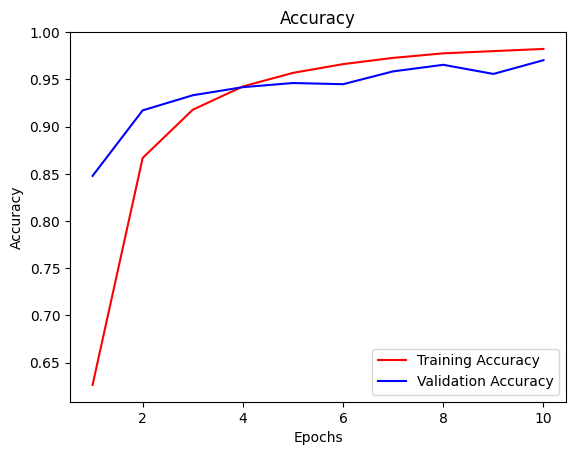

In [15]:
#plotting training and validation accuracy against number of epochs
epochs = [i for i in range(1,11)]

plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

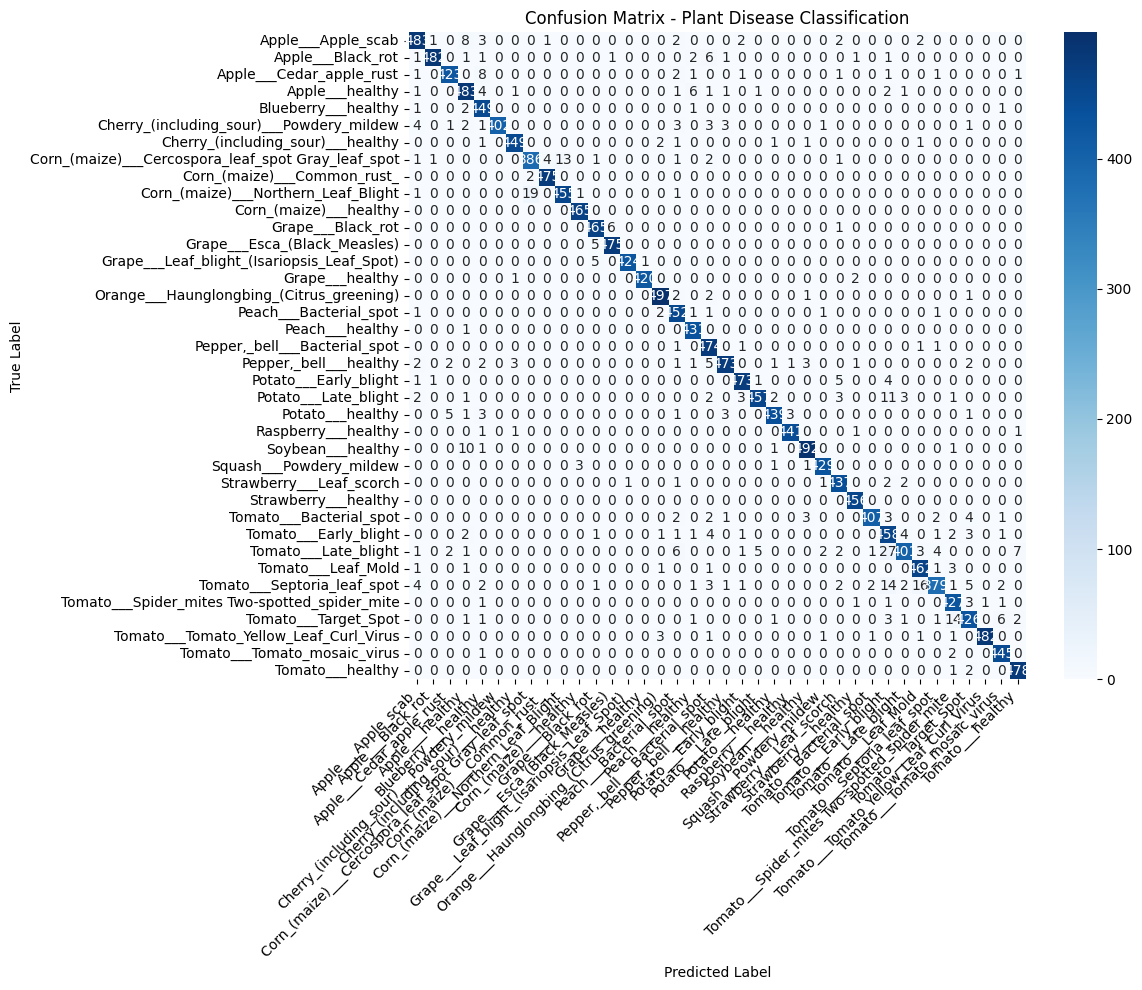


Detailed Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.94      0.96      0.95       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Bl

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Get class names from the dataset
class_names = validation_ds.class_names
print(f"Class names: {class_names}")
print(f"Number of classes: {len(class_names)}")

# Extracting true labels and predictions
y_true = []
y_pred_proba = []

# Iterating through the dataset to get predictions
for images, labels in validation_ds:
    # Getting predictions for current batch
    batch_pred = model.predict(images, verbose=0)
    y_pred_proba.extend(batch_pred)
    y_true.extend(labels.numpy())

# Converting to numpy arrays
y_true = np.array(y_true)
y_pred_proba = np.array(y_pred_proba)

# Converting predictions to class indices
y_pred = np.argmax(y_pred_proba, axis=1)
y_true_labels = np.argmax(y_true, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_true_labels, y_pred)
precision = precision_score(y_true_labels, y_pred, average='weighted')
recall = recall_score(y_true_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Generating confusion matrix
cm = confusion_matrix(y_true_labels, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix - Plant Disease Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true_labels, y_pred, target_names=class_names))

In [19]:
#saving model
model.save('model.h5')